In [1]:
from Angrybird import AngryBird
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
env=AngryBird()

# 60 coeffs

In [2]:
seconds = np.arange(11)
pos = np.zeros((11, 2))
pos[:, 0] = seconds * 10
pos[:, 1] = seconds * 20 - 2 * seconds**2

In [3]:
def main(state, coeffs):
    t = int(state[0])
    return coeffs[t, :2]*pos[t]-coeffs[t, 2:4]*state[1:] + coeffs[t, 4:]

In [11]:
mean_states[-1]

array([89.00404178, 18.34948787])


118.47199841687896


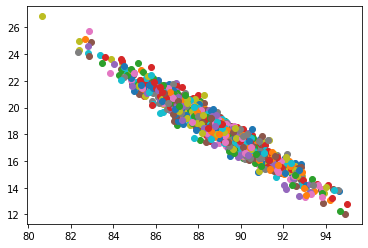

In [10]:
coeffs = np.load("css.npy")
vents = np.load("vents.npy")
mean_states = np.load("mean_states.npy")
sqr2 = 1 / np.sqrt(2)
rot = np.array([[sqr2, -sqr2],
                [sqr2, sqr2]])
nul=np.zeros(2)
costs = 0.
m = 1100

for z in tqdm(range(m)):
    state = env.reset(False)
    env.vent = vents[z]
    for y in range(10):
        if y == 9:
            plt.scatter(state[1], state[2])
        force = main(state, coeffs)
        state, _, _, _ = env.step(force)
    state, _, _, _ = env.step(nul)
    costs += env.cost.sum()
print(costs/m)

In [7]:
nul=np.zeros(2)
m = 100
n = 1000
vents = np.load("vents.npy")
ecart = 0.001
cos_min = 400.
while cos_min > 13:
    for i in range(10):
        for k in range(6):
            coeff_change = np.linspace(coeffs[i][k]-ecart, coeffs[i][k]+ecart, 9)
            costs = np.zeros(9)
            for j in range(9):
                coeffs[i][k] = coeff_change[j]
                for z in range(m):
                    state = env.reset()
                    env.vent = vents[z]
                    for _ in range(10):
                        force = main(state, coeffs)
                        state, _, _, _ = env.step(force)
                    env.step(nul)
                    costs[j] += env.cost.sum()
            coeffs[i][k] = coeff_change[np.argmin(costs)]
    cos = 0.
    for z in range(n):
        state = env.reset(False)
        env.vent = vents[z]
        for _ in range(10):
            force = main(state, coeffs)
            state, _, _, _ = env.step(force)
        env.step(nul)
        cos += env.cost.sum()
    cos /= n
    if cos < cos_min:
        cos_min = cos
        np.save("css", coeffs)
    else:
        cos_min = cos + 20
        m += 100
        n += 100
        ecart /= 2
    print(m, n, ecart, costs.min()/m, cos)

100 1000 0.001 111.94206050988727 118.13205699400935
100 1000 0.001 111.89675447545449 118.03767903342381
100 1000 0.001 111.8666212598693 118.01670750041751
100 1000 0.001 111.84650666637064 118.00273286356186
100 1000 0.001 111.82946464878607 117.99019539980722
100 1000 0.001 111.81084663248775 117.97206684947724
100 1000 0.001 111.79437781617361 117.95360659717528
100 1000 0.001 111.77845368151739 117.94025179418036
100 1000 0.001 111.76511706052554 117.92594850917766
100 1000 0.001 111.7524839045184 117.90773889306695
100 1000 0.001 111.74181096541993 117.89794275880176
100 1000 0.001 111.73180644063315 117.88937379206736
100 1000 0.001 111.72070444049977 117.88313428940418
100 1000 0.001 111.71171752167876 117.87012099716279
100 1000 0.001 111.70100262614005 117.85334807507
100 1000 0.001 111.69160201654276 117.84309887877069
100 1000 0.001 111.68216461838722 117.83860731487485
100 1000 0.001 111.67283271640308 117.82607087396822
100 1000 0.001 111.66569491165497 117.8188713096495

KeyboardInterrupt: 

In [6]:
#print(coeffs)
print(costs/m)

[120.25290498 120.25290498 120.25290498 120.25290498   1.54149944
   0.           0.           0.           0.           0.        ]


In [ ]:
coeffs